In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

## Data Cleaning

In [2]:
df_original = pd.read_csv("rideshare_kaggle.zip")

In [3]:
df_original.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df_original["cab_type"].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

In [5]:
print("Uber: " + str(round(df_original[df_original["cab_type"] == "Uber"].shape[0] * 100 / df_original.shape[0], 2)) + "%")
print("Lyft: " + str(round(df_original[df_original['cab_type'] == "Lyft"].shape[0] * 100 / df_original.shape[0], 2)) + "%")


Uber: 55.65%
Lyft: 44.35%


In [6]:
df_original.shape

(693071, 57)

693,071 instances and 57 attributes

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [3]:
df_cleaned = df_original.drop(["id", "timezone", "timestamp", "product_id", "name", "windGustTime", "temperatureHighTime", "temperatureLowTime", "apparentTemperatureHighTime", "apparentTemperatureLowTime", "sunriseTime", "sunsetTime", "uvIndexTime", "temperatureMinTime", "temperatureMaxTime", "apparentTemperatureMinTime", "apparentTemperatureMaxTime"], axis=1)
df_cleaned["minutes"] = df_cleaned["datetime"].apply(lambda x: int(x[-5:-3]))
df_cleaned["seconds"] = df_cleaned["datetime"].apply(lambda x: int(x[-2:]))
df_cleaned.drop("datetime", axis=1, inplace=True)

In [4]:
df_cleaned["icon"] = df_cleaned["icon"].astype("string")
df_cleaned["short_summary"] = df_cleaned["short_summary"].astype("string")
df_cleaned["long_summary"] = df_cleaned["long_summary"].astype("string")
df_cleaned["source"] = df_cleaned["source"].astype("string")
df_cleaned["destination"] = df_cleaned["destination"].astype("string")
df_cleaned["cab_type"] = df_cleaned["cab_type"].astype("string")

In [5]:
df_cleaned["price"] = df_cleaned["price"].fillna(df_cleaned["price"].median())

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hour                     693071 non-null  int64  
 1   day                      693071 non-null  int64  
 2   month                    693071 non-null  int64  
 3   source                   693071 non-null  string 
 4   destination              693071 non-null  string 
 5   cab_type                 693071 non-null  string 
 6   price                    693071 non-null  float64
 7   distance                 693071 non-null  float64
 8   surge_multiplier         693071 non-null  float64
 9   latitude                 693071 non-null  float64
 10  longitude                693071 non-null  float64
 11  temperature              693071 non-null  float64
 12  apparentTemperature      693071 non-null  float64
 13  short_summary            693071 non-null  string 
 14  long

In [12]:
df_cleaned.to_csv("Cleaned Dataset.csv", index=False)

In [6]:
df_numeric = df_cleaned.iloc[:]

In [7]:
le = LabelEncoder()
df_numeric["cab_type"] = le.fit_transform(df_numeric["cab_type"])

In [15]:
df_numeric["cab_type"].value_counts()

cab_type
1    385663
0    307408
Name: count, dtype: int64

Uber -> 1

Lyft -> 0

In [8]:
columns = ["source", "destination", "short_summary", "long_summary", "icon"]
ohe = OneHotEncoder()
DisperseMatrix = ohe.fit_transform(df_numeric[columns])
df_numeric_codify = pd.DataFrame.sparse.from_spmatrix(DisperseMatrix)
df_numeric_final = pd.concat([df_numeric, df_numeric_codify], axis=1)
df_numeric_final = df_numeric_final.drop(columns, axis=1)
df_numeric_final.columns = df_numeric_final.columns.astype("string")

In [17]:
df_numeric_final.head()

,hour,day,month,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,...,41,42,43,44,45,46,47,48,49,50
0,9,16,12,0,5.0,0.44,1.0,42.2148,-71.033,42.34,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,0,11.0,0.44,1.0,42.2148,-71.033,43.58,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,28,11,0,7.0,0.44,1.0,42.2148,-71.033,38.33,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30,11,0,26.0,0.44,1.0,42.2148,-71.033,34.38,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,29,11,0,9.0,0.44,1.0,42.2148,-71.033,37.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


80% train and 20% test

In [9]:
Ynumeric = df_numeric_final["cab_type"]
Xnumeric = df_numeric_final.drop("cab_type", axis=1)

In [10]:
XtrainNumeric, XtestNumeric, YtrainNumeric, YtestNumeric = train_test_split(Xnumeric, Ynumeric, test_size=0.2)

In [12]:
ss = StandardScaler()
dataXtrainSta, dataXtestSta = ss.fit_transform(XtrainNumeric.values), ss.fit_transform(XtestNumeric.values)
XtrainSta, XtestSta = pd.DataFrame(data=dataXtrainSta, columns=XtrainNumeric.columns), pd.DataFrame(data=dataXtestSta, columns=XtestNumeric.columns)

## Decision Tree

In [22]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=10)
tree.fit(XtrainNumeric.values, YtrainNumeric.values)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)

In [23]:
def visualizeTree(tree):
    fig, ax = plt.subplots(figsize=(32,12))
    print("Depth of the tree: ", tree.get_depth())
    print("Number of leaves: ", tree.get_n_leaves())

    plot = plot_tree(
            decision_tree = tree,
            feature_names = df_numeric_final.iloc[:,:-1].columns.tolist(),
            class_names = None,
            filled = True,
            impurity = False,
            fontsize = 11,
            ax = ax
    )

Depth of the tree:  20
Number of leaves:  3822


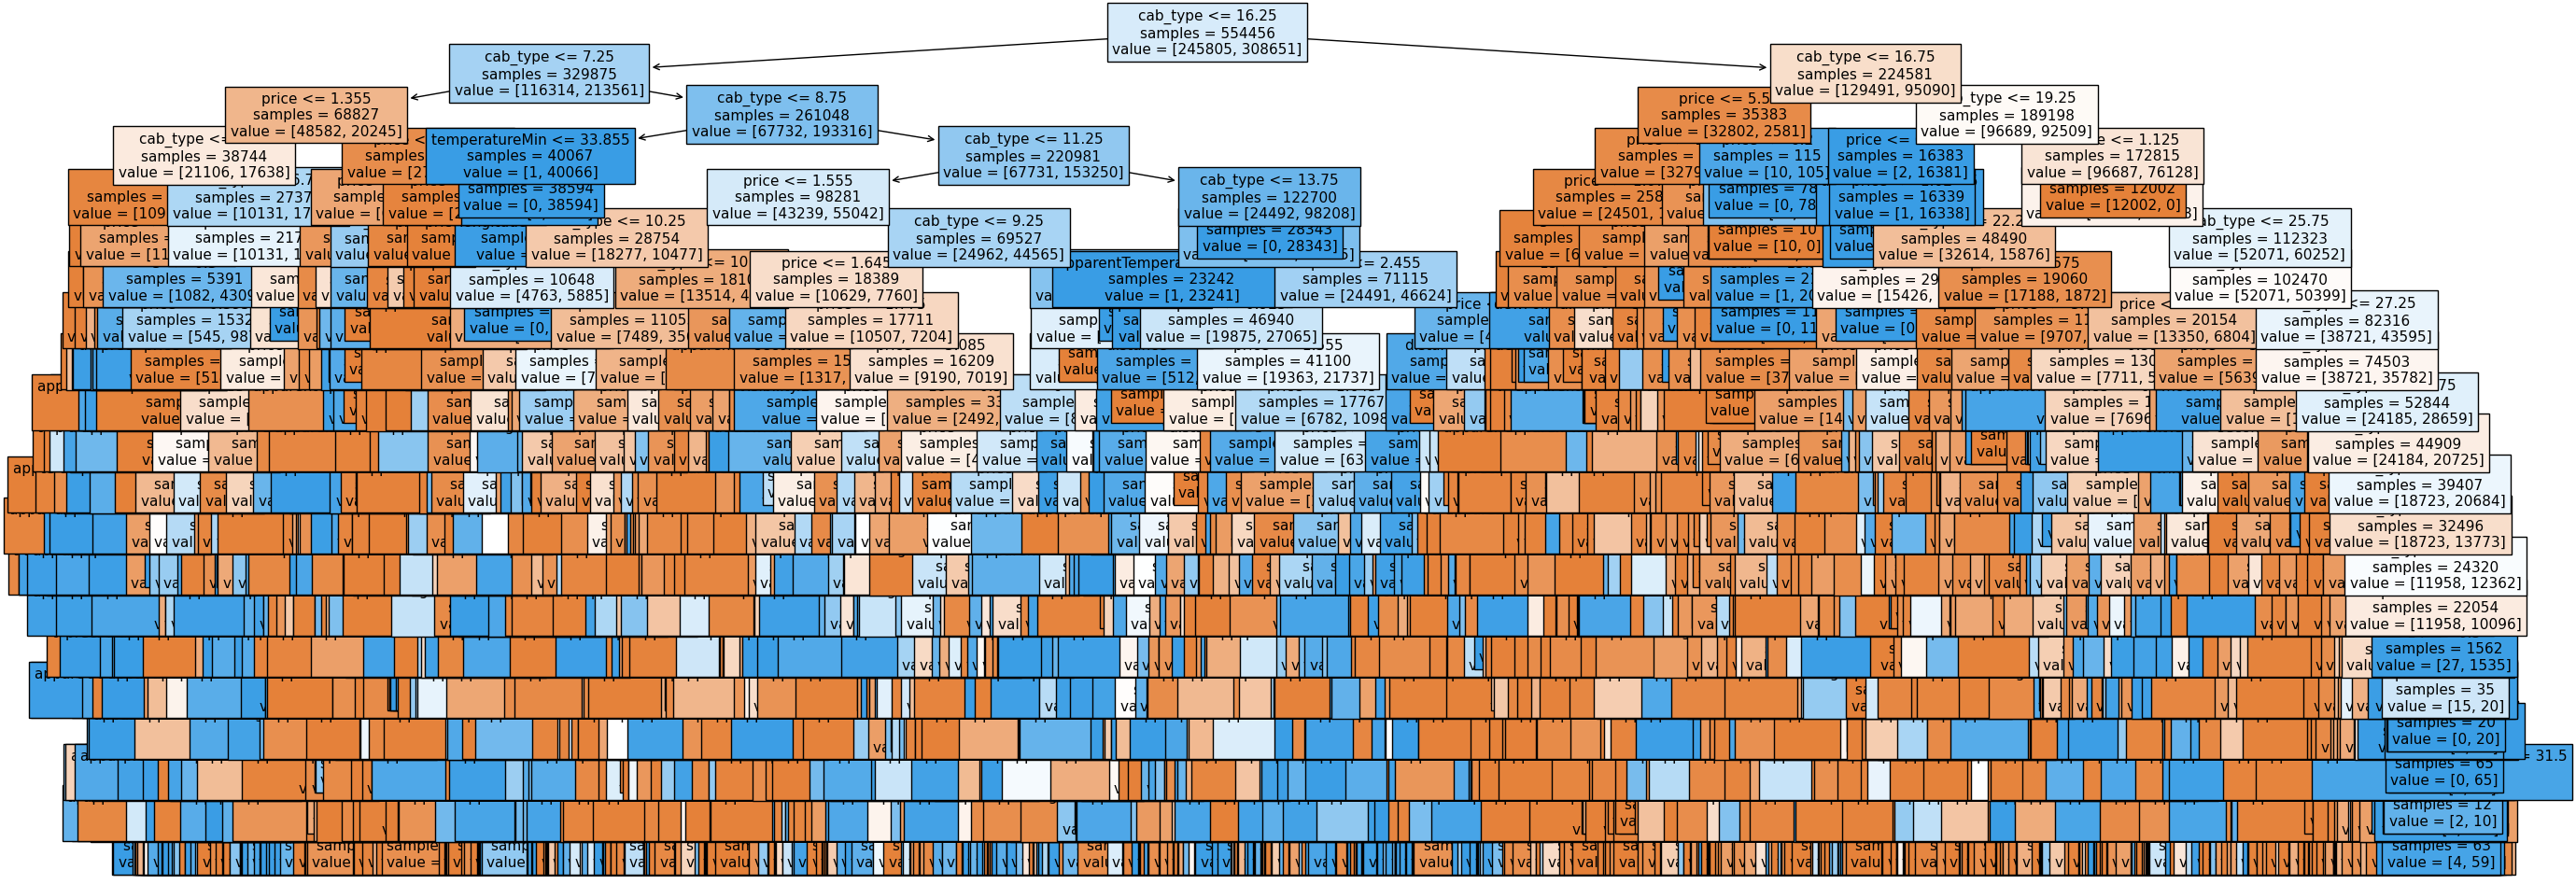

In [24]:
visualizeTree(tree)

In [14]:
def predictionsTree(tree, X, label):
    Ypred = tree.predict(X)
    Ytrue = label
    cm = confusion_matrix(Ytrue, Ypred, labels=tree.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
    disp.plot()
    plt.show()

    acc = accuracy_score(Ytrue, Ypred)
    recall = recall_score(Ytrue, Ypred)
    precision = precision_score(Ytrue, Ypred)
    f1 = f1_score(Ytrue, Ypred)
    print(f"Accuracy = {acc * 100:.2f}%")
    print(f"Recall = {recall * 100:.2f}%")
    print(f"Precision = {precision * 100:2f}%")
    print(f"F1 = {f1 * 100:.2f}%")

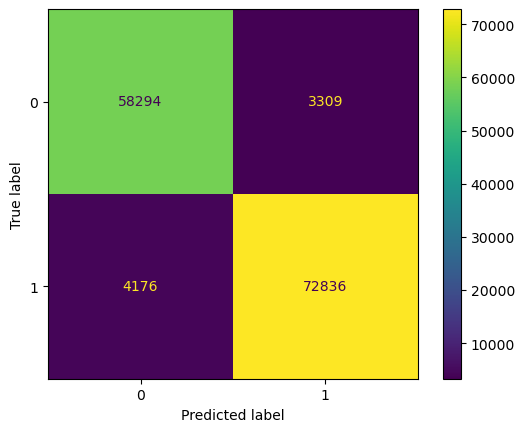

Accuracy = 94.60%
Recall = 94.58%
Precision = 95.654344%
F1 = 95.11%


In [26]:
predictionsTree(tree, XtestNumeric.values, YtestNumeric.values)

In [27]:
pickle.dump(tree, open("Tree_gini_20depth_10samplesLeave", "wb"))

## Naive Bayes

In [16]:
NB = GaussianNB()
NB.fit(XtrainNumeric.values, YtrainNumeric.values)

GaussianNB()

In [20]:
def predictions(model, X, label):
    Ypred = model.predict(X)
    Ytrue = label
    cm = confusion_matrix(Ytrue, Ypred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    acc = accuracy_score(Ytrue, Ypred)
    recall = recall_score(Ytrue, Ypred)
    precision = precision_score(Ytrue, Ypred)
    f1 = f1_score(Ytrue, Ypred)
    print(f"Accuracy = {acc * 100:.2f}%")
    print(f"Recall = {recall * 100:.2f}%")
    print(f"Precision = {precision * 100:2f}%")
    print(f"F1 = {f1 * 100:.2f}%")

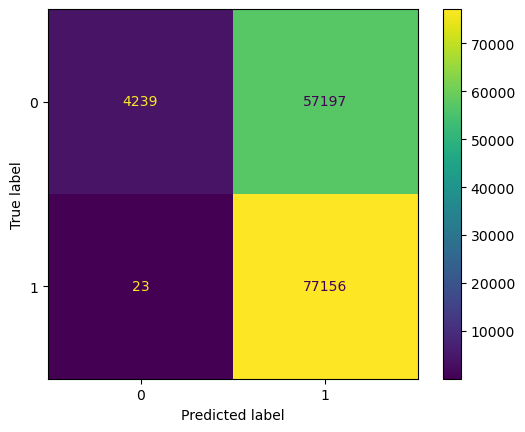

Accuracy = 58.72%
Recall = 99.97%
Precision = 57.427821%
F1 = 72.95%


In [19]:
predictions(NB, XtestNumeric.values, YtestNumeric.values)

In [20]:
pickle.dump(NB, open("NaiveBayes", "wb"))

## Logistic Regression

In [18]:
LR = LogisticRegression(penalty="l1", C=0.1, class_weight={1: 0.55, 0: 0.45}, solver='saga', max_iter=1000)

In [19]:
LR.fit(XtrainSta.values, YtrainNumeric.values)

LogisticRegression(C=0.1, class_weight={0: 0.45, 1: 0.55}, max_iter=1000,
                   penalty='l1', solver='saga')

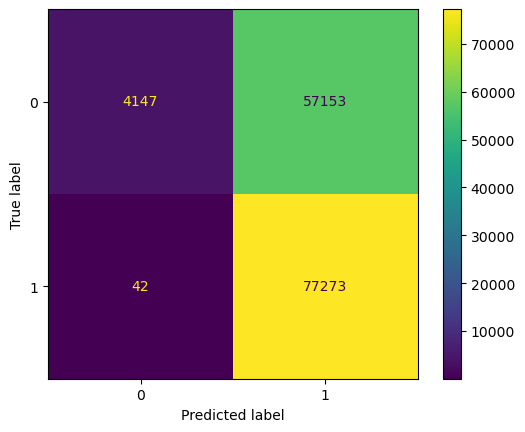

Accuracy = 58.74%
Recall = 99.95%
Precision = 57.483671%
F1 = 72.99%


In [21]:
predictions(LR, XtestSta.values, YtestNumeric.values)

In [24]:
pickle.dump(LR, open("LogisticRegression_penaltyL1_C0.1_classWeight1_0.55_0_0.45_solveSaga_MaxIter1000", "wb"))

## SVM

In [29]:
SVM = LinearSVC(penalty="l2", C=0.1, class_weight='balanced', dual=False)

In [30]:
SVM.fit(XtrainSta.values, YtrainNumeric.values)

LinearSVC(C=0.1, class_weight='balanced', dual=False)

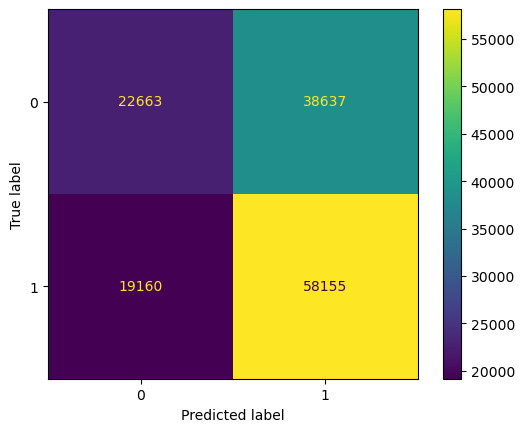

Accuracy = 58.30%
Recall = 75.22%
Precision = 60.082445%
F1 = 66.80%


In [31]:
predictions(SVM, XtestSta.values, YtestNumeric.values)

In [32]:
pickle.dump(SVM, open("SVM1_penaltyL2_C0.1_dualFalse_classWeightBalanced", "wb"))

In [48]:
SVM2 = LinearSVC(penalty="l2", C=1, class_weight={0:0.60, 1:0.40}, dual=False)

In [49]:
SVM2.fit(XtrainSta.values, YtrainNumeric.values)

LinearSVC(C=1, class_weight={0: 0.6, 1: 0.4}, dual=False)

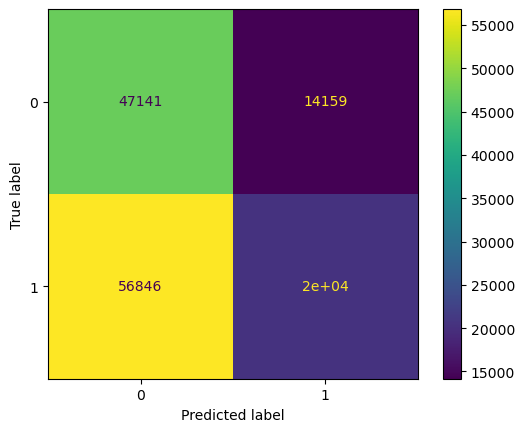

Accuracy = 48.78%
Recall = 26.47%
Precision = 59.111124%
F1 = 36.57%


In [50]:
predictions(SVM2, XtestSta.values, YtestNumeric.values)

In [51]:
pickle.dump(SVM2, open("SVM2_penaltyL2_C1_classWeight0_0.60_1_0.40_dualFalse", "wb"))

## Ensembles

### Our Models

In [58]:
svm_pipeline = Pipeline([('scaler', ss), ('svm', SVM2)])

In [59]:
votes = VotingClassifier(estimators=[('tree', tree), ('NaiveBayes', NB), ("SVM", SVM2)], n_jobs=-1, voting='hard')

In [60]:
votes.fit(XtrainNumeric.values, YtrainNumeric.values)

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=20,
                                                     min_samples_leaf=10)),
                             ('NaiveBayes', GaussianNB()),
                             ('SVM',
                              LinearSVC(C=1, class_weight={0: 0.6, 1: 0.4},
                                        dual=False))],
                 n_jobs=-1)

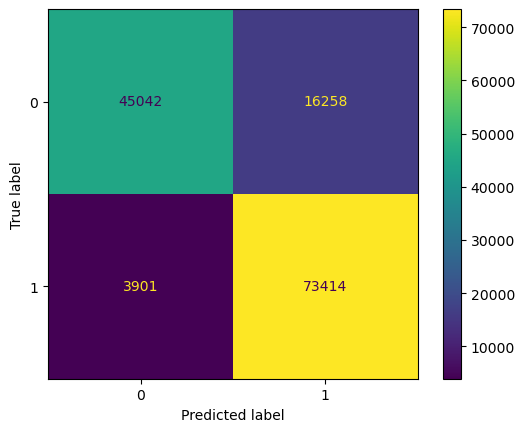

Accuracy = 85.46%
Recall = 94.95%
Precision = 81.869480%
F1 = 87.93%


In [61]:
predictions(votes, XtestNumeric.values, YtestNumeric.values)

In [62]:
pickle.dump(votes, open("Ensamble_tree_nb_svm", "wb"))

### Random Forest

In [63]:
forest = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=20, min_samples_leaf=10, n_jobs=-1)

In [64]:
forest.fit(XtrainNumeric.values, YtrainNumeric.values)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=1000,
                       n_jobs=-1)

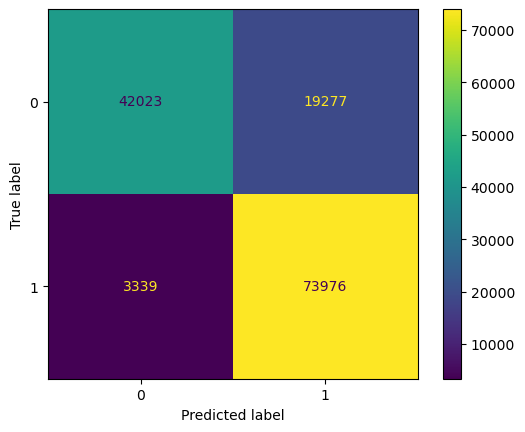

Accuracy = 83.68%
Recall = 95.68%
Precision = 79.328279%
F1 = 86.74%


In [65]:
predictions(forest, XtestNumeric.values, YtestNumeric.values)

In [66]:
pickle.dump(forest, open("RandomForest", "wb"))